<a href="https://colab.research.google.com/github/mrhallonline/NLP-work/blob/main/Natural_Language_Toolkit_(NLTK)_Workshop_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Overview**
1. **Introduction to NLTK**
2. **Working with NLTK builtin datasets**
3. **Preprocessing and cleaning datasets**
4. **Basic analysis**
5. **Sentiment analysis Activity**
6. **Further Usage**

7. **important considerations having to do with research!!**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.0 Natural Language Processing Introduction

## 1.1 Installing NLTK dependencies and libraries

1. NLTK
2.   [Matplotlib](https://matplotlib.org/) library: Library for creating data visualizations.
3.   [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) library: Pulls information from HTML and XML files.
4.   [Gensim](https://pypi.org/project/gensim/) library: Natural language processing tool
5.   [PyPDF2](https://pypdf2.readthedocs.io/en/3.0.0/index.html#) library: NLTK normally works with text files, PyPDF2 will allow you to read, write, convert to text, and merge pdf files
6. Numpy
7. SciPy
8. Pandas
9. Scikit
10. Autocorrect


In [ ]:
!pip install nltk
!pip install matplotlib
!pip install beautifulsoup4
!pip install gensim
!pip install PyPDF2
!pip install numpy
!pip install scipy
!pip install pandas
!pip install scikit-learn
!pip install autocorrect
import nltk
nltk.download('popular')

# 1.1 Loading data: Import text corpus to your Google Drive current folder.
This is needed to occur in order to use the same data. The cell will download the text file and save it in your Google Drive so it can be accessed by this Colab document. You can use this same code to download any file that you have sharing access with, just change the file_id with the new one.

In [3]:
import requests

# This is the full shared Drive link, the file id starts at 1-6A...
#https://drive.google.com/file/d/1-6AkzKuyfY9Oj__MWQFCP_Yo-TSzMS0F/view?usp=drive_link

# get the file ID from the shareable link and paste below
file_id = "1-6AkzKuyfY9Oj__MWQFCP_Yo-TSzMS0F"

# construct the download URL
download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

# send a GET request to the download URL and save the response content
response = requests.get(download_url)

# The next line names the file after download. If you change it here, you will also need to change in the subsequent fields.
with open("OPSEMERGED.txt", "wb") as f:
    f.write(response.content)

# 2.0 Working with different data types
1. Downloading NLTK corpora
2. Using raw text
3. Text files
4. PDf files
5. CSV files
6. HTML files

## 2.1 Working with builtin corpora using NLTK

NLTK has access to a large body of example corpora than can be directly incorporated and analyzed.
Descriptions of for each corpus module can be found here:
1. https://www.nltk.org/nltk_data/ and here
2. https://www.nltk.org/api/nltk.corpus.html
* The syntax of the code can also be changed to download specific, all, or groups of modules for example:

```
# nltk.download('all') or
# nltk.download('popular') or
# nltk.download('gutenberg') ##this name is found at id:gutenberg
```

In this case we are looking at the STate of the Union corpus finding out the frequency and context of the word education throughout the document using the concordance method.

In [7]:
import nltk
nltk.download('state_union')
union = nltk.Text(nltk.corpus.state_union.words())
union.concordance('education', lines = 25)

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


Displaying 25 of 235 matches:
loyment . Opportunities for a good education and adequate medical care must be 
icy , social security and health , education , the farm program , public works 
mption and full employment . ( k ) Education . Although the major responsibilit
major responsibility for financing education rests with the States , some assis
rly equal opportunities for a good education . The proposed Federal grants for 
e nearly adequate expenditures for education . But inequality among the States 
 , and will not seek , to dominate education in the States . It should continue
 financial support to the cause of education in areas where this is desirable .
535 million dollars for veterans ' education under provisions of the Servicemen
lement such services . For medical education , I have recommended legislation a
ing legislation . 7 . RESEARCH AND EDUCATION The Budget provides for continuati
lementary , secondary , and higher education are expected to be substantially a
ount , the

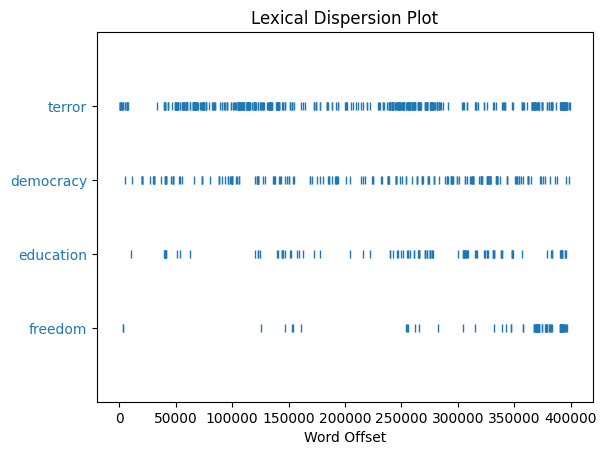

In [9]:
union.dispersion_plot(["freedom","education", "democracy", "terror"])

# 2.3 Importing Text Files
Text files can be used directly and don't need to be converted in order to be imported into NLTK. Many other file types, other than raw text and downloaded corpora, will need to be first initially converted to text files in order to be used in our NLTK data flow

In [ ]:
# load data from existing text file
filename = '/content/OPSEMERGED.txt'
textfile = open(filename, 'rt', encoding='utf-8', errors='replace')

text_file = textfile.read()
textfile.close()
print(text_file)

##2.4 Converting PDF files into text files

The follwing code will iterarte through all pages of a pdf document converting them item into text, which is subsequently saved as a text file for further processing by NLTK.

Change the path to point to your folder in Google Drive. You can right-click the folder to get this path when using Colab.
```
# with open('/content/drive/MyDrive/pdfs/ScienceEducation.pdf', 'rb') as file:
```




In [15]:
# Open the PDF
!pip install PyPDF2
import PyPDF2 as pdf
with open('/content/drive/MyDrive/pdfs/ScienceEducation.pdf', 'rb') as file: # Change this path as needed
    mypdf = pdf.PdfReader(file)

    # Initialize an empty string to hold the text
    text_holder = ''

    # Loop through each page and extract the text
    for i in range(len(mypdf.pages)):
        page = mypdf.pages[i]
        text_holder += page.extract_text()

##2.4a View the contents of the variable

In [16]:
text_holder

'58 GEXERAL SCIENCE QUATERLY \nEditorials \nGENEUAL SCIISHCE AT THE &TA‘l!IOXAL EDUCATION A~SOCIATION - \nIN Xrsw YORK. \nThe four special sessions on four different days were devoted \nrespectively to chemistry, -physics, biolQgy, and science. One pa- \nper nt le& on general science was on the program for each bf \nthese sessions and many other * subjects sidetracked into -general \nscience. The prominence of this subject in appearing on these \ndifferent programs is significant and yet gives little idea of’the \nkeen inkrest given to it. In the last three sessions, nine-tenths \nof the di’scussion provoked izs on the subject of general science. \nGeneral science was tlie one live issue which interested all teachers \nalike. \non the bearing of general scicnw on- later courses in physics and \nchemistry. The gencral feeling was that the general science should \n‘ be’ taught,,not to’ prepatc sfor soqc future course,, but40 develop! \nand educate the pupil according to his capacity. \nA

##2.4b Save the contents of the variable to a text file to be used by NLTK
These two cells will save the contents of the pdf file to a text file then load the text file in order for it to be processed.

In [21]:
# Save the extracted text to a text file
output_file_path = '/content/drive/MyDrive/pdfs/output_text.txt'  # Change this path as needed

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write(text_holder)

print(f"Extracted text saved to {output_file_path}")


Extracted text saved to /content/drive/MyDrive/pdfs/output_text.txt


In [ ]:
# load data from the text file
filename = '/content/drive/MyDrive/pdfs/output_text.txt'
textfile = open(filename, 'rt', encoding='utf-8', errors='replace')

text_file = textfile.read()
textfile.close()
print(text_file)

# 3.0 Initial Preprocessing/Text Wrangling/Normalizing Text

1. Tokenizing text - words versus sentences


```
#Tokenize the words
text_wordTokens = nltk.word_tokenize(equity_text_tokens)

#Tokenize the sentences
text_sentTokens = nltk.sent_tokenize(equity_text_tokens)

#Regular expression tokenizing
text_regexTokens = nltk.regexp_tokenize()
```


2. Case conversion
3. Removing characters that are not alphanumeric

```
text_wordTokens = [word for word in text_tokens if word.isalpha()]
```

4. Normalizing tokens (cases)
5. Expanding contractions
6. Spelling
7. Stemming
8. Lemmatizing
9. Stop Words

```
#removing stop words from list
from nltk.stem.snowball import stopwords

stopwords = nltk.corpus.stopwords.words("english")
text_tokens = [word for word in text_tokens if word.lower() not in stopwords]

```
10. All in one function


# 3.1 Different ways of tokenizing text
text_wordTokens
text_sentenceTokens
text_

In [27]:
import nltk
nltk.download('punkt')

text_tokens = text_file

# Word Tokenization
text_wordTokens = nltk.word_tokenize(text_tokens)

# Sentence Tokenization
text_sentTokens = nltk.sent_tokenize(text_tokens)

# Regular expression tokenizing
pattern = r'\w+'
text_regexTokens = nltk.regexp_tokenize(text_tokens, pattern)

# Convert the tokens to an nltk.Text object
#equity_text_tokens = nltk.Text(equity_text_wordTokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
text_regexTokens


In [33]:
sorted(set(text_regexTokens)[0:10])
sorted_regex_tokens = sorted(set(text_regexTokens))[:10]
print(sorted_unique_tokens)


TypeError: ignored

Removing

In [ ]:
#Combined All in one normalizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
# split into words
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text)
# convert to lower case
lower_tokens = [w.lower() for w in word_tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in lower_tokens]
# remove remaining tokens that are not alphabetic
alpha_words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
OPSEwords = [w for w in alpha_words if not w in stop_words]
print(OPSEwords[:100])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lesson', 'something', 'act', 'like', 'mirror', 'window', 'time', 'lesson', 'anchoring', 'phenomenon', 'days', 'watch', 'puzzling', 'video', 'music', 'student', 'see', 'reflection', 'seems', 'mirror', 'student', 'see', 'teacher', 'side', 'mirror', 'teacher', 'see', 'student', 'wonder', 'something', 'act', 'like', 'mirror', 'window', 'time', 'investigate', 'scenario', 'using', 'box', 'model', 'maps', 'system', 'video', 'develop', 'initial', 'class', 'consensus', 'model', 'explain', 'oneway', 'mirror', 'phenomenon', 'identify', 'related', 'phenomena', 'could', 'help', 'us', 'explain', 'share', 'questions', 'oneway', 'mirror', 'helps', 'us', 'form', 'driving', 'question', 'board', 'brainstorm', 'investigations', 'data', 'need', 'answer', 'questions', 'building', 'toward', 'ngss', 'students', 'develop', 'model', 'identify', 'important', 'parts', 'system', 'parts', 'interact', 'could', 'cause', 'object', 'look', 'different', 'different', 'light', 'conditions', 'ask', 'questions', 'arise', 

In [25]:
print(text_file)

58 GEXERAL SCIENCE QUATERLY 
Editorials 
GENEUAL SCIISHCE AT THE &TA‘l!IOXAL EDUCATION A~SOCIATION - 
IN Xrsw YORK. 
The four special sessions on four different days were devoted 
respectively to chemistry, -physics, biolQgy, and science. One pa- 
per nt le& on general science was on the program for each bf 
these sessions and many other * subjects sidetracked into -general 
science. The prominence of this subject in appearing on these 
different programs is significant and yet gives little idea of’the 
keen inkrest given to it. In the last three sessions, nine-tenths 
of the di’scussion provoked izs on the subject of general science. 
General science was tlie one live issue which interested all teachers 
alike. 
on the bearing of general scicnw on- later courses in physics and 
chemistry. The gencral feeling was that the general science should 
‘ be’ taught,,not to’ prepatc sfor soqc future course,, but40 develop! 
and educate the pupil according to his capacity. 
At thaecting of biul

In [ ]:
nltk.download('stopwords')  # has to be done once
from nltk import word_tokenize

OPSE_tokens = nltk.Text(OPSEwords)
OPSE_tokens.collocations()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


chart paper; attending equity; related phenomena; driving question;
sticky notes; question board; consensus model; display slide; science
notebook; end day; noticings wonderings; scientists circle; oil palm;
min materials; bath bomb; paper markers; notice wonder; develop
initial; initial model; universal design


compute frequency distribution of words found in the document. Can find most common, least, total count, etc.

In [ ]:
#Top ten most common words
fd = nltk.FreqDist(OPSEwords)
fd.most_common(100)

In [ ]:
fd.tabulate(25)

 students questions     ideas     model       min   initial     class  question   student    lesson      unit     share       one       use     slide different      make      help   related   develop    models       ask    poster phenomena     chart 
     2227       877       735       661       552       530       524       510       456       412       412       398       380       369       346       340       339       337       333       327       322       316       316       309       291 


Word count

In [ ]:
fd["equity"]

141

In [ ]:
fd.plot(35, cumulative=True)

In [ ]:
from matplotlib import pyplot as plt
# Create a frequency distribution
#fd = nltk.FreqDist(tokens_nltk_text)

# Get the 10 most common words and their counts
common = fd.most_common(10)

# Unzip the words and counts into two separate lists
words, counts = zip(*common)

# Create a bar graph
plt.bar(words, counts)
plt.show()

# 3.3 Part of Speech Tagging

```
# This is formatted as code
```



In [ ]:
import nltk
from nltk import wordpunct_tokenize
nltk.pos_tag(OPSE_tokens)

# 3.4 Spelling correction

In [ ]:
import nltk
from nltk import word_tokenize
from autocorrect import Speller
spell = Speller(lang='en')
OPSE_autocorrect = OPSEwords
spell('definitly')

'definitely'

# 3.5 Stemming

In [ ]:
import nltk
stemmer = nltk.stem.PorterStemmer()
stemmer.stem("production")

'product'

# 3.6 Lemmatization

In [ ]:
import nltk
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer

# 4.0 Basic analysis
1. Words/Sentences
  *   Counting/Sorting
  *   Concordance
2. Chunking
3. Data Visualization
  *   plot distribution
3. POS Tagging
4. Parsing

This displays the total number of individual words left after several rounds of preprocessing. These numbers are good to keep up with as you continue to clean your data.

In [ ]:
len(OPSEwords)

72769

The sorted set lists and alphabetizes all words that appear at least once throughout the document. This is another important step in cleaning your data. We can also use other preprocessing methods to shrink this list down such as stemming and lemmatizing.

In [ ]:
sorted(set(OPSEwords))

# 4.1 More quick analysis options
1. concordance
2. similar words
3. dispersion plots


In [ ]:
OPSE_tokens.concordance('remember', lines = 50)

In [ ]:
OPSE_tokens.similar("students")

In [ ]:
OPSE_tokens.dispersion_plot(["students","teacher", "diverse", "diversity", "teacher", "student"])

# 4.2 n-grams and colocations
1. bigrams
2. trigrams


In [ ]:
equity_text_tokens_bigrams = list(nltk.bigrams(OPSEwords))
equity_text_tokens_bigrams

In [ ]:
equity_text_tokens_trigrams = list(nltk.trigrams(OPSEwords))
equity_text_tokens_trigrams

In [ ]:
finder = nltk.collocations.BigramCollocationFinder.from_words(OPSEwords)
finder.ngram_fd.tabulate(25)

The following code will allow you to write the contents of a variable to a text file instead of just to memory.

In [ ]:
OPSE_tokens.similar("share")

In [ ]:
OPSE_tokens.common_contexts(["students", "ask"])

questions_written slide_students group_students


#5.0 Sentiment Analysis
1. Movie transcript database

# 6.0 Further Usage

TESTING

In [ ]:
# load data
filename = '/content/drive/MyDrive/pdfs/OPSEMERGEDCleanv3.txt'
file = open(filename, 'rt', encoding='utf-8', errors='replace')


#file = open(filename, 'rt', encoding='utf-8', errors='ignore')
#file = open(filename, 'rt', encoding='latin-1')
#file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['lesson', 'something', 'act', 'like', 'mirror', 'window', 'time', 'lesson', 'anchoring', 'phenomenon', 'days', 'watch', 'puzzling', 'video', 'music', 'student', 'see', 'reflection', 'seems', 'mirror', 'student', 'see', 'teacher', 'side', 'mirror', 'teacher', 'see', 'student', 'wonder', 'something', 'act', 'like', 'mirror', 'window', 'time', 'investigate', 'scenario', 'using', 'box', 'model', 'maps', 'system', 'video', 'develop', 'initial', 'class', 'consensus', 'model', 'explain', 'oneway', 'mirror', 'phenomenon', 'identify', 'related', 'phenomena', 'could', 'help', 'us', 'explain', 'share', 'questions', 'oneway', 'mirror', 'helps', 'us', 'form', 'driving', 'question', 'board', 'brainstorm', 'investigations', 'data', 'need', 'answer', 'questions', 'building', 'toward', 'ngss', 'students', 'develop', 'model', 'identify', 'important', 'parts', 'system', 'parts', 'interact', 'could', 'cause', 'object', 'look', 'different', 'different', 'light', 'conditions', 'ask', 'questions', 'arise', 

len(words)

In [ ]:
len(words)

72769

In [ ]:
sorted(set(words))

['class',
 'ideas',
 'initial',
 'lesson',
 'min',
 'model',
 'question',
 'questions',
 'student',
 'students']

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

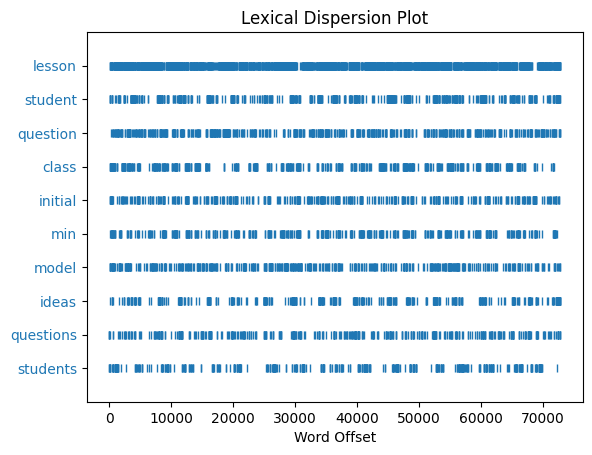

In [ ]:
nltk.draw.dispersion.dispersion_plot(OPSEwords, words, ignore_case=False, title='Lexical Dispersion Plot')

<Figure size 1000x400 with 0 Axes>

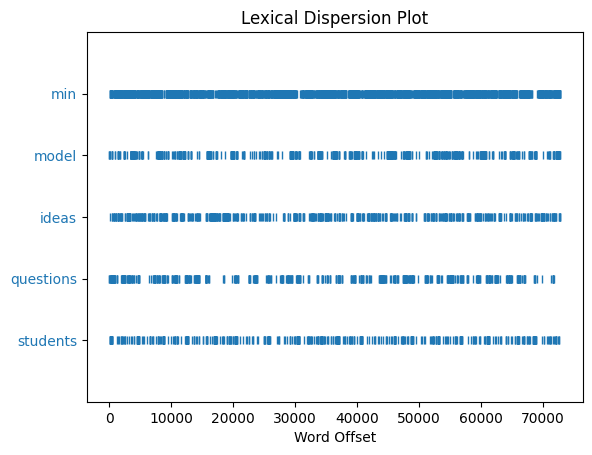

In [ ]:
fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
#OPSE_tokens.dispersion_plot(["students","teacher", "diverse", "diversity", "teacher", "student"])
#OPSE_tokens.plot(10)
nltk.draw.dispersion.dispersion_plot(OPSEwords, words, ignore_case=False, title='Lexical Dispersion Plot')
#nltk.draw.dispersion_plot(OPSEwords, words, ignore_case=False, title='Lexical Dispersion Plot')
plt.show()
fig.savefig('freqDist7.png', bbox_inches = "tight")

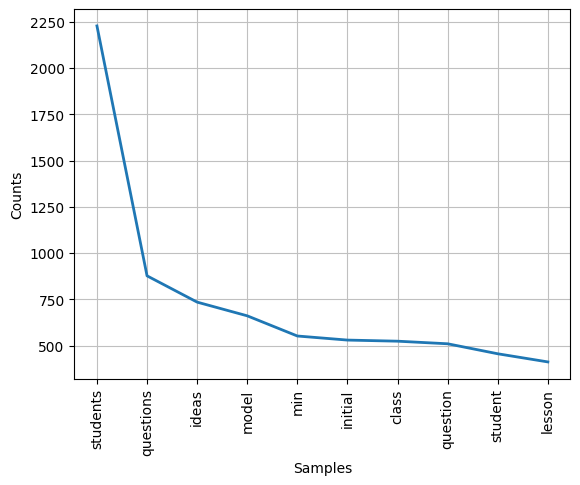

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.ion()
OPSE_tokens.plot(10)
plt.savefig('img_common.png')
plt.ioff()
plt.show()

In [ ]:
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt


text1 = OPSE_tokens

fig = plt.figure()
dplot = text1.dispersion_plot(["students"])
# save the figure
fig.savefig('dispersion_plot1.png')

# Testing out a Corpus TIMIT Acoustic-Phonetic Continuous Speech Corpus

In [ ]:
import nltk
nltk.download('timit')
files = nltk.corpus.timit.fileids()
#from nltk.corpus import timit
#timit.sents()
#files = timit.fileids()
files


# Working with Different File Types
1. CSV files
2. PDF files
3. TXT files



# Text files

In [ ]:
# load data
filename = '/content/OPSEMERGED.txt'
textfile = open(filename, 'rt', encoding='utf-8', errors='replace')

text = textfile.read()
textfile.close()
text

# Importing csv files

In [ ]:
import csv
input_file = open("lexicon.csv", "rb") [1]
for row in csv.reader(input_file): [2]
print(row)
['sleep', 'sli:p', 'v.i', 'a condition of body and mind ...']
['walk', 'wo:k', 'v.intr', 'progress by lifting and setting down each foot ...']
['wake', 'weik', 'intrans', 'cease to sleep']

# Importing file from github repo